In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import math
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from metrics import evaluate_regression
from LinearRegressionTask import normalize,prepare_X,hypothesis,gradient_descent,cost_function

In [108]:
df = pd.read_csv(r'Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [109]:
print(df.shape)

(2938, 22)


In [110]:
#Removing spaces on data columns' names
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [111]:
df.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Population,2286.0,1.275338e+07,6.101210e+07,34.00000,195793.250000,1.386542e+06,7.420359e+06,1.293859e+09
GDP,2490.0,7.483158e+03,1.427017e+04,1.68135,463.935626,1.766948e+03,5.910806e+03,1.191727e+05
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
Percentage_Exp,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Under_Five_Deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03
Adult_Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Infant_Deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
HepatitisB,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Diphtheria,2919.0,8.232408e+01,2.371691e+01,2.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01
Polio,2919.0,8.255019e+01,2.342805e+01,3.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01


## Ananlysis of data


In [112]:
#scatter plots: feature vs feature, feature vs target
#sns.pairplot(df)

In [113]:

label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

df['Status'] = label_encoder.fit_transform(df['Status'])
df[['Country']] = ordinal_encoder.fit_transform(df[['Country']])


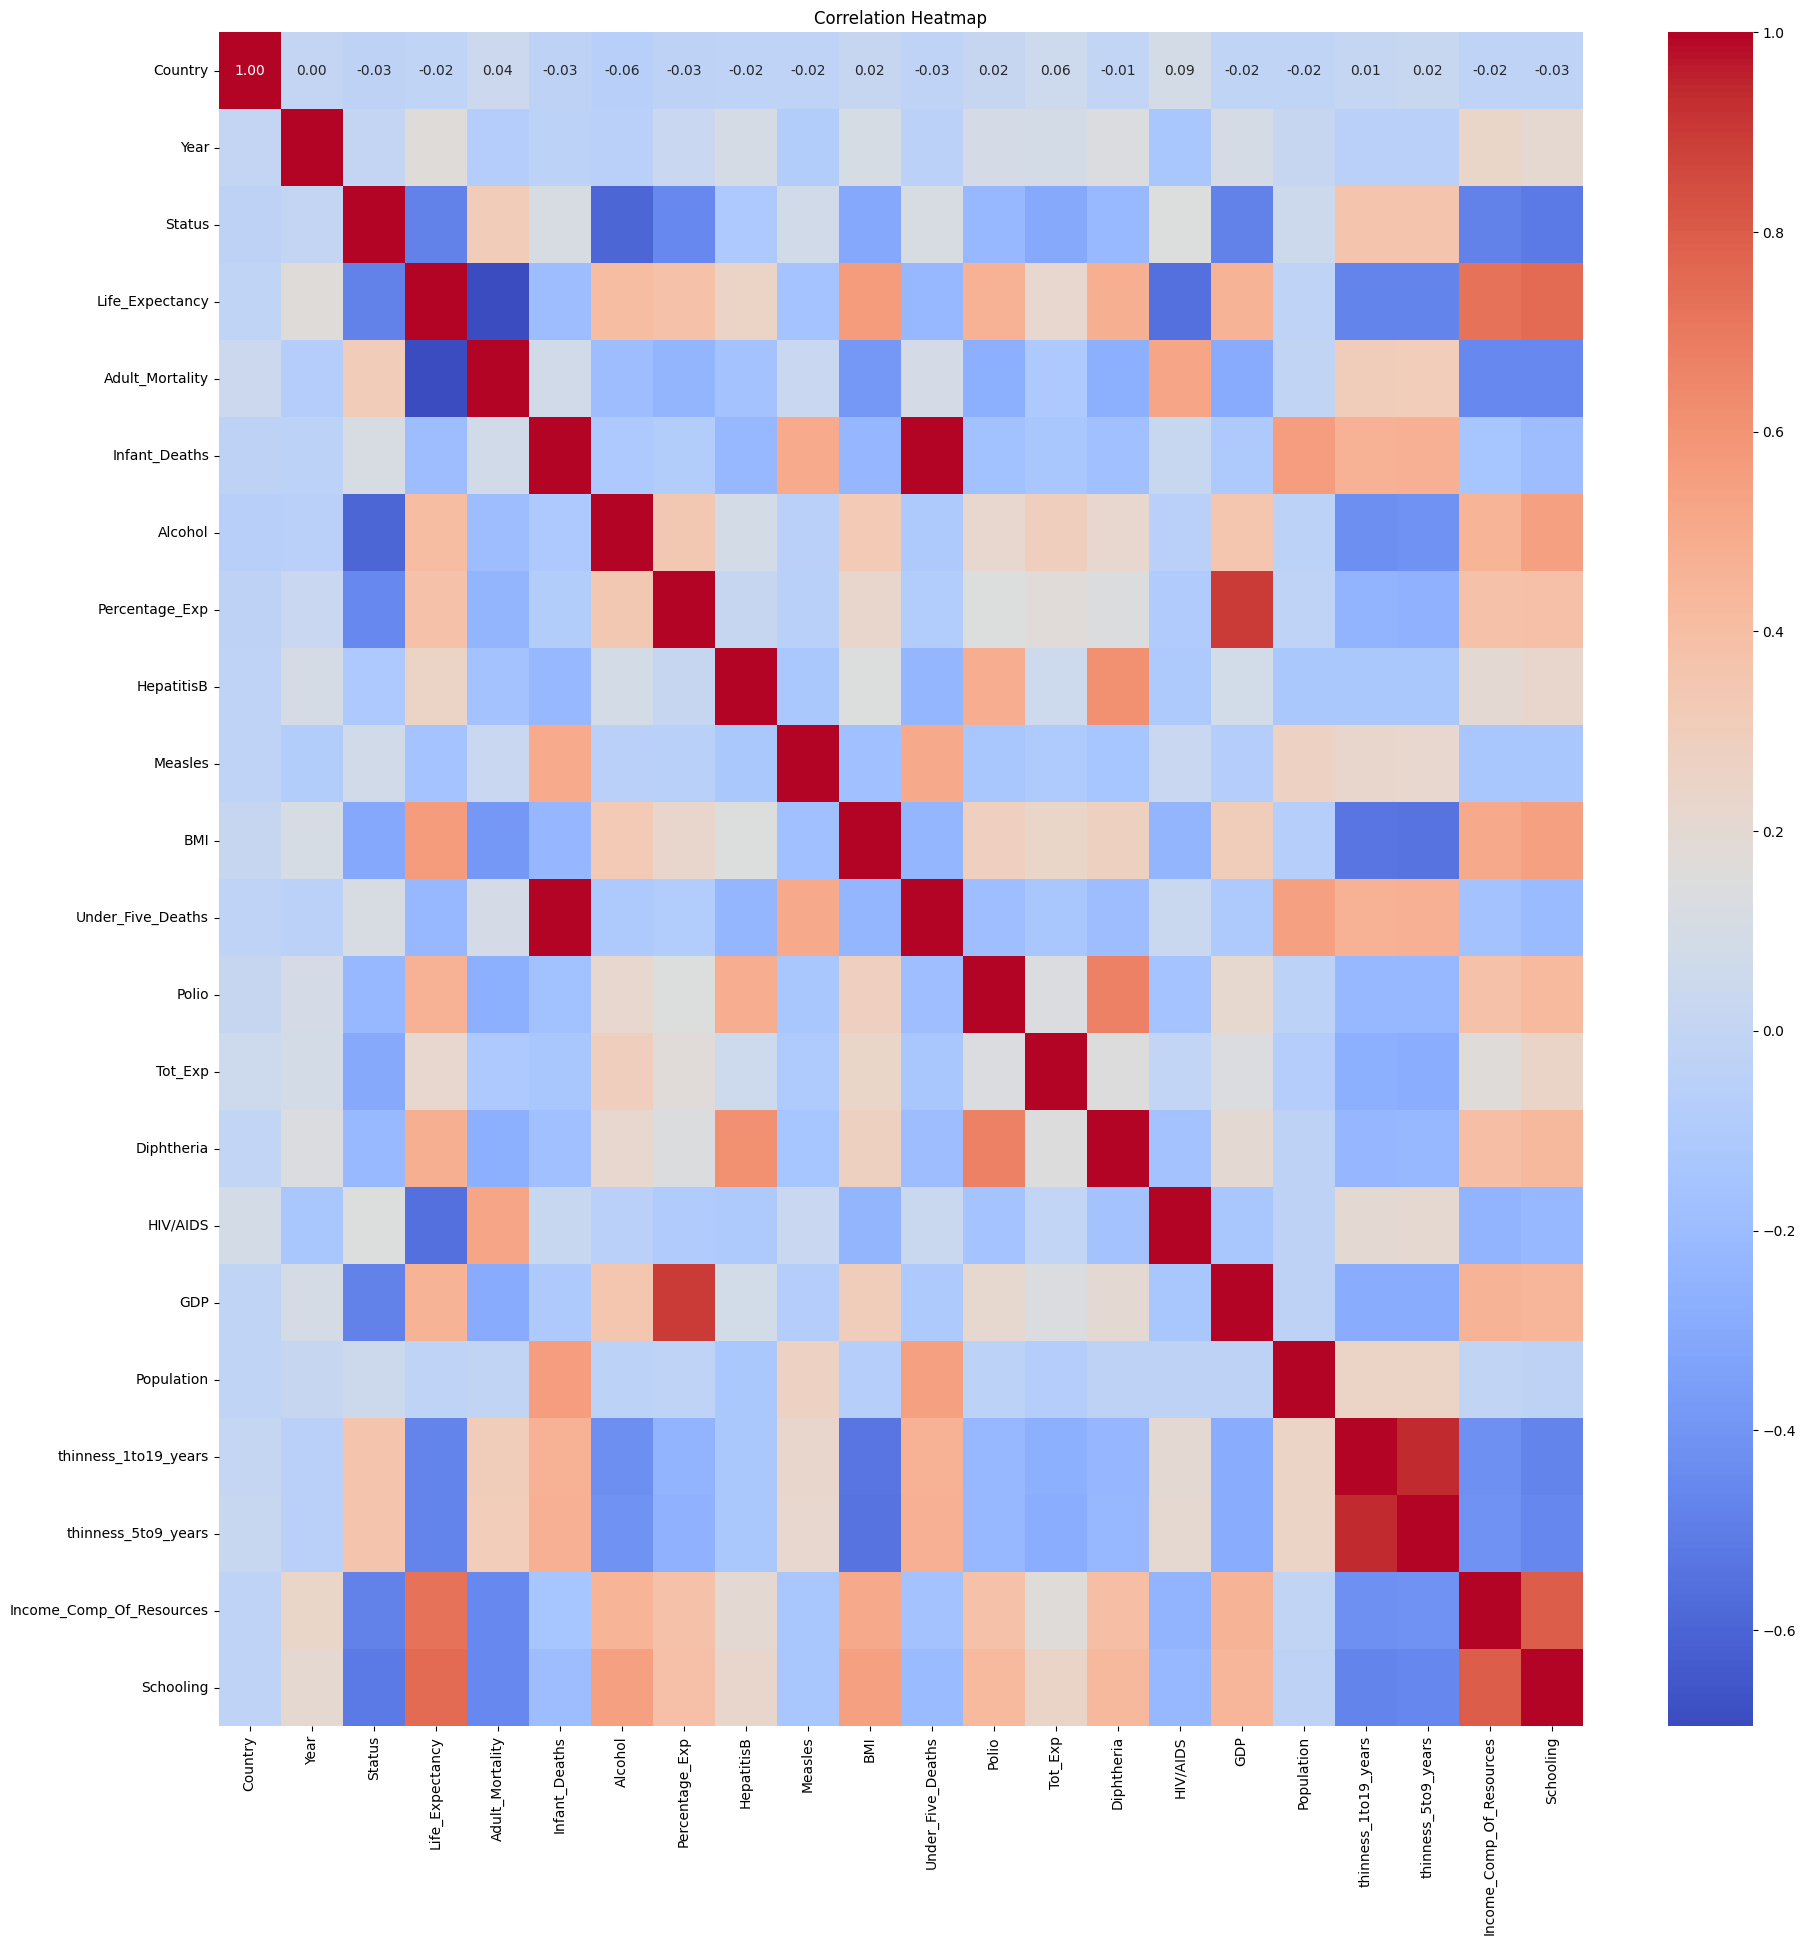

In [114]:
#corellation between features
corr_matr = df.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [115]:
corr_matr

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.016763,0.039802,-0.030528,-0.062134,-0.032983,-0.020741,-0.024593,...,0.017807,0.055374,-0.006138,0.090206,-0.016841,-0.016669,0.008049,0.022687,-0.024503,-0.026167
Year,0.001342,1.000000,0.001864,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,...,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Status,-0.031635,0.001864,1.000000,-0.482136,0.315284,0.112252,-0.596660,-0.454261,-0.115317,0.076955,...,-0.220250,-0.299990,-0.216913,0.148590,-0.478339,0.045801,0.368389,0.366751,-0.478402,-0.514045
Life_Expectancy,-0.016763,0.170033,-0.482136,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,...,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult_Mortality,0.039802,-0.079052,0.315284,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,...,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
Infant_Deaths,-0.030528,-0.037415,0.112252,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,...,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.062134,-0.052990,-0.596660,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,...,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage_Exp,-0.032983,0.031400,-0.454261,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,...,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,-0.020741,0.104333,-0.115317,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,...,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.024593,-0.082493,0.076955,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,...,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225


In [116]:
#correlation between features and target variable 
corr_matr["Life_Expectancy"].sort_values(ascending = False)

Life_Expectancy             1.000000
Schooling                   0.751975
Income_Comp_Of_Resources    0.724776
BMI                         0.567694
Diphtheria                  0.479495
Polio                       0.465556
GDP                         0.461455
Alcohol                     0.404877
Percentage_Exp              0.381864
HepatitisB                  0.256762
Tot_Exp                     0.218086
Year                        0.170033
Country                    -0.016763
Population                 -0.021538
Measles                    -0.157586
Infant_Deaths              -0.196557
Under_Five_Deaths          -0.222529
thinness_5to9_years        -0.471584
thinness_1to19_years       -0.477183
Status                     -0.482136
HIV/AIDS                   -0.556556
Adult_Mortality            -0.696359
Name: Life_Expectancy, dtype: float64

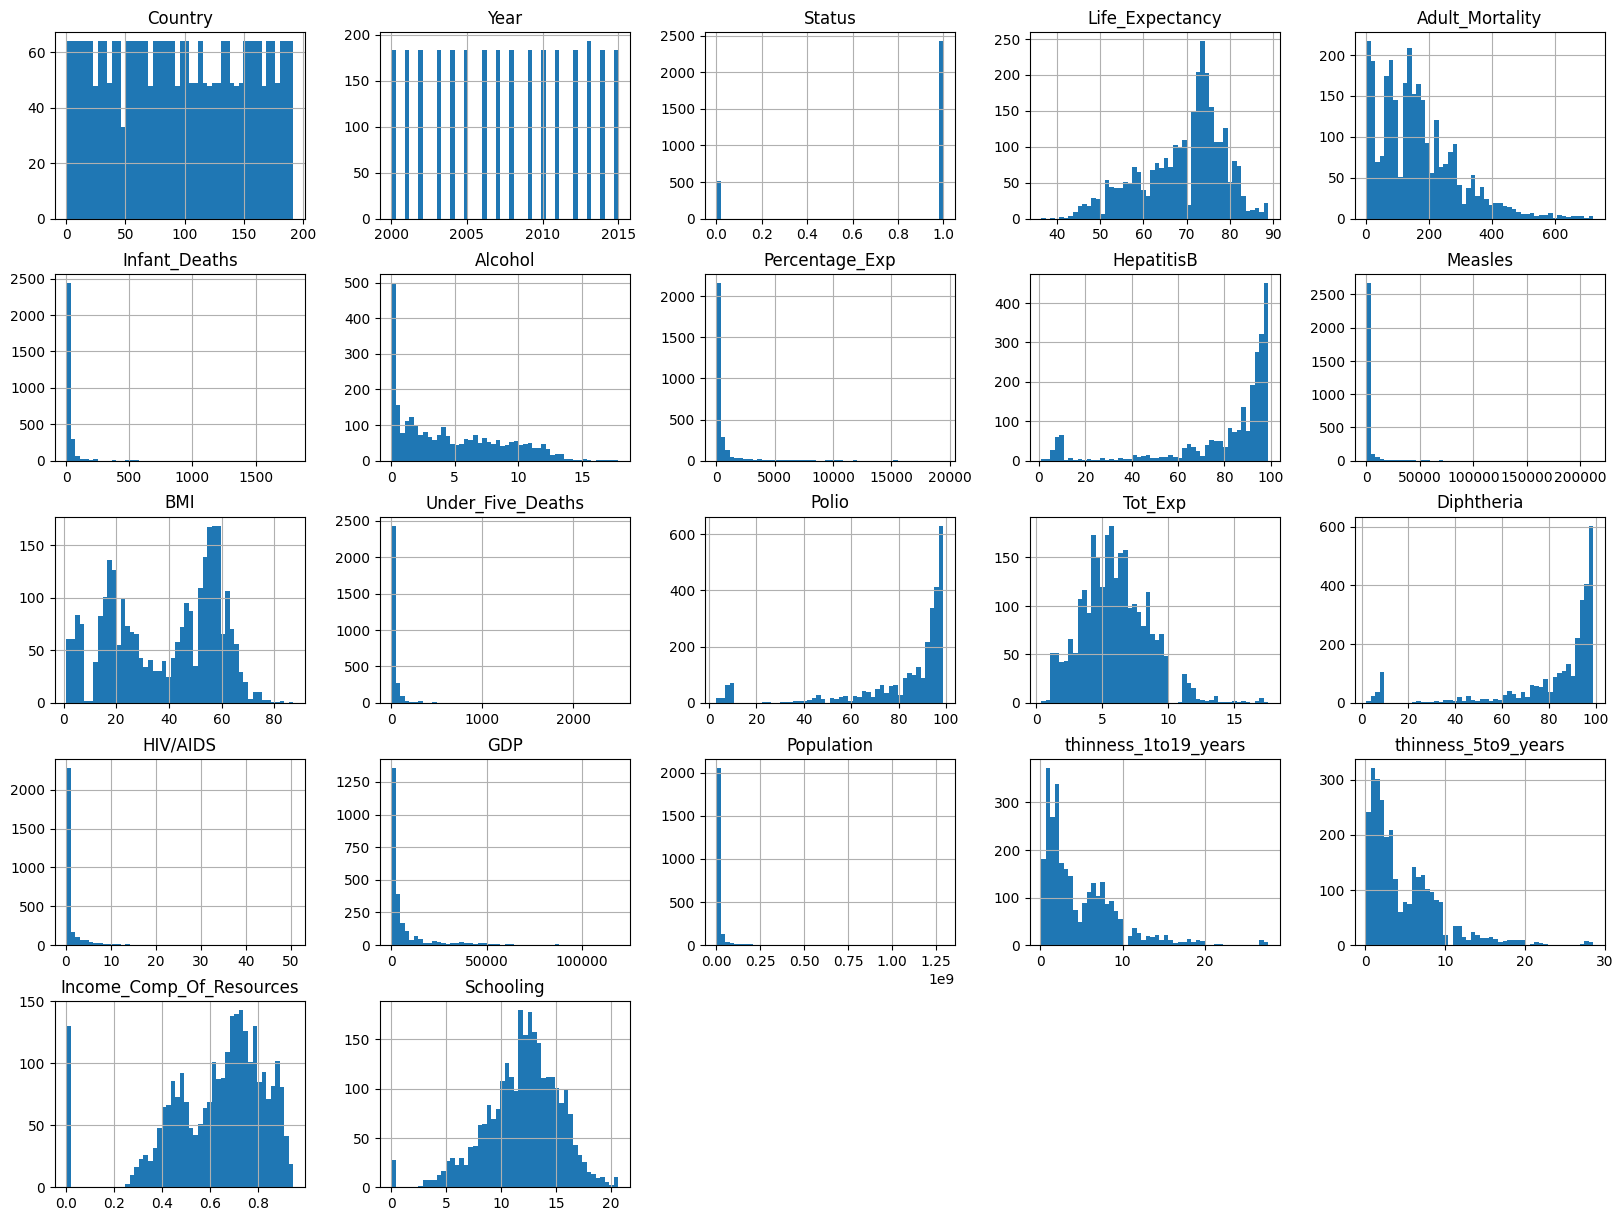

In [117]:
#bar charts for features
df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Feature selection and augmentation

In [118]:
#Feature selection
threshold = 0.5
relevant_features = corr_matr[abs(corr_matr['Life_Expectancy']) > threshold].index.tolist()
print("Relevant features:", relevant_features)

Relevant features: ['Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS', 'Income_Comp_Of_Resources', 'Schooling']


In [119]:
#Filling missing values and standartization
df['Life_Expectancy'].fillna(value=df['Life_Expectancy'].mean(), inplace = True)

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
        ("numerical", numerical_pipeline, relevant_features[1:])
    ])

train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train_t = full_pipeline.fit_transform(train)

# Linear Regressor

### Sklearn Regressor

In [120]:
lin_reg = LinearRegression().fit(X_train_t, train["Life_Expectancy"])

In [121]:
y_train_lr_pred = lin_reg.predict(X_train_t)
print("Linear Regression - Train")
evaluate_regression(train.Life_Expectancy, y_train_lr_pred)

Linear Regression - Train


{'mae': 3.2467161133547457,
 'mse': 20.64383449161053,
 'rmse': 4.543548667243538,
 'r2': 0.7738504714165753}

In [122]:
X_test_t = full_pipeline.transform(test)
y_test_lr_pred = lin_reg.predict(X_test_t)
print("Linear Regression - Test")
evaluate_regression(test.Life_Expectancy, y_test_lr_pred)

Linear Regression - Test


{'mae': 3.213224228639137,
 'mse': 19.74559630187716,
 'rmse': 4.44360172628884,
 'r2': 0.7720836476002805}

### Custom regressor

In [123]:
for i in relevant_features:
    mean = df[i].mean()
    df[i].fillna(value=mean, inplace = True)

In [124]:
X, y = df[relevant_features[1:]].copy(), df['Life_Expectancy'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(2350, 5), y=(2350,)
Test set: X=(588, 5), y=(588,)


In [125]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
y = y_train[:]
theta = np.array([0, 0, 0, 0, 0, 0])

In [126]:
alpha = 0.01
num_iters = 1500
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)

X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

In [130]:
y_train_pred = hypothesis(X,new_theta)
print("Linear Regression - Train")
evaluate_regression(y_train, y_train_lr_pred)

Linear Regression - Train


{'mae': 3.2467161133547457,
 'mse': 20.64383449161053,
 'rmse': 4.543548667243538,
 'r2': 0.7738504714165753}

In [129]:
print("Linear Regression - Test")
evaluate_regression(y_test, y_test_pred)

Linear Regression - Test


{'mae': 3.211368551367851,
 'mse': 19.665728392701492,
 'rmse': 4.434605776470045,
 'r2': 0.7730055342961702}

## Feature Importance

In [128]:
feature_importances = lin_reg.coef_
attributes = full_pipeline.get_feature_names_out()
sorted(zip(feature_importances, attributes), reverse=True)

[(2.885387640769598, 'numerical__Schooling'),
 (1.811644553571368, 'numerical__Income_Comp_Of_Resources'),
 (1.2673906639021162, 'numerical__BMI'),
 (-2.428459458525109, 'numerical__HIV/AIDS'),
 (-2.909761418180833, 'numerical__Adult_Mortality')]